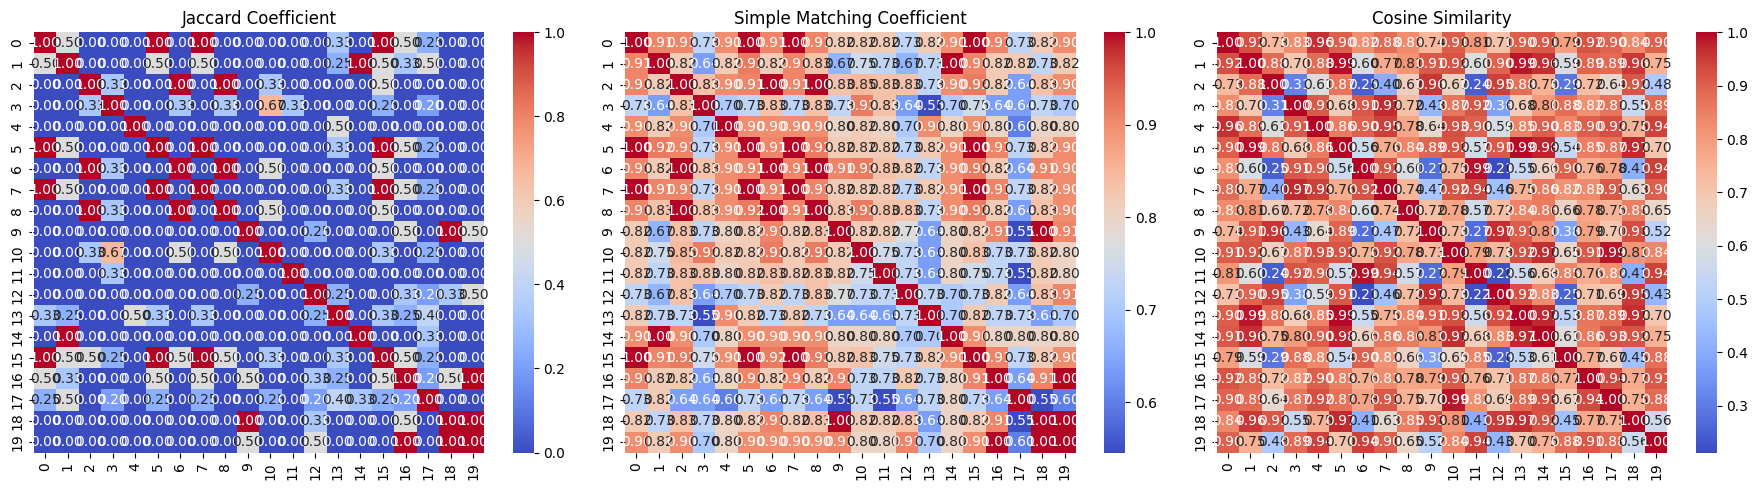

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

def preprocess_data(df):
    """Preprocess data by handling missing values, encoding categorical variables, and normalizing numeric columns."""
    # Convert all columns to string to handle mixed types
    for col in df.columns:
        df[col] = df[col].astype(str)

    # Separate numeric and categorical columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    categorical_cols = df.select_dtypes(include=[object]).columns

    # Convert numeric columns from string if necessary
    for col in numeric_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert and coerce errors to NaN

    # Impute missing values for numeric columns
    if not numeric_cols.empty:
        df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())  # Mean for numeric columns

    # Impute missing values for categorical columns with mode
    for col in categorical_cols:
        mode_value = df[col].mode()
        if not mode_value.empty:
            df[col] = df[col].replace('nan', mode_value[0])  # Handle 'nan' strings
            df[col] = df[col].fillna(mode_value[0])  # Mode for categorical columns

    # Encode categorical columns using Label Encoding
    le = LabelEncoder()
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col])  # Convert categorical data to numeric

    # Normalize numeric columns
    if not numeric_cols.empty:
        df[numeric_cols] = (df[numeric_cols] - df[numeric_cols].mean()) / df[numeric_cols].std()

    return df

def calculate_similarity_matrices(df):
    """Calculate Jaccard Coefficient, Simple Matching Coefficient, and Cosine Similarity matrices."""
    # Random sampling of 20 vectors
    sample_df = df.sample(n=20, random_state=42)

    # Initialize matrices for similarity measures
    n = sample_df.shape[0]
    jc_matrix = np.zeros((n, n))
    smc_matrix = np.zeros((n, n))
    cosine_matrix = np.zeros((n, n))

    # Calculate similarity measures
    for i in range(n):
        for j in range(i, n):
            vector1 = sample_df.iloc[i].values
            vector2 = sample_df.iloc[j].values

            # Jaccard Coefficient (JC) for binary attributes
            binary_cols = (vector1 == 0) | (vector1 == 1)
            f11 = np.sum((vector1[binary_cols] == 1) & (vector2[binary_cols] == 1))
            f10 = np.sum((vector1[binary_cols] == 1) & (vector2[binary_cols] == 0))
            f01 = np.sum((vector1[binary_cols] == 0) & (vector2[binary_cols] == 1))
            jc = f11 / (f01 + f10 + f11) if (f01 + f10 + f11) > 0 else float('nan')
            jc_matrix[i, j] = jc
            jc_matrix[j, i] = jc

            # Simple Matching Coefficient (SMC) for binary attributes
            f00 = np.sum((vector1[binary_cols] == 0) & (vector2[binary_cols] == 0))
            smc = (f11 + f00) / (f00 + f01 + f10 + f11) if (f00 + f01 + f10 + f11) > 0 else float('nan')
            smc_matrix[i, j] = smc
            smc_matrix[j, i] = smc

            # Cosine Similarity
            dot_product = np.dot(vector1, vector2)
            norm_vector1 = np.linalg.norm(vector1)
            norm_vector2 = np.linalg.norm(vector2)
            cosine_similarity = dot_product / (norm_vector1 * norm_vector2) if norm_vector1 > 0 and norm_vector2 > 0 else float('nan')
            cosine_matrix[i, j] = cosine_similarity
            cosine_matrix[j, i] = cosine_similarity

    return jc_matrix, smc_matrix, cosine_matrix

def plot_similarity_matrices(jc_matrix, smc_matrix, cosine_matrix):
    """Plot heatmaps for the similarity matrices."""
    plt.figure(figsize=(18, 5))

    plt.subplot(1, 3, 1)
    sns.heatmap(jc_matrix, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Jaccard Coefficient')

    plt.subplot(1, 3, 2)
    sns.heatmap(smc_matrix, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Simple Matching Coefficient')

    plt.subplot(1, 3, 3)
    sns.heatmap(cosine_matrix, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Cosine Similarity')

    plt.tight_layout()
    plt.show()

def main():
    """Main function to execute data processing and visualization."""
    file_path = '/content/Lab Session Data.xlsx'

    try:
        # Load the "marketing_campaign" dataset
        df = pd.read_excel(file_path, sheet_name='marketing_campaign')

        # Preprocess data
        df = preprocess_data(df)

        # Calculate similarity matrices
        jc_matrix, smc_matrix, cosine_matrix = calculate_similarity_matrices(df)

        # Plot similarity matrices
        plot_similarity_matrices(jc_matrix, smc_matrix, cosine_matrix)

    except FileNotFoundError:
        print(f"Error: The file at path '{file_path}' was not found. Please check the file path and try again.")
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    main()
